In [1]:

# import module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#---------------------------------------------------------
# Daten laden
#
# CSV Datei lesen
crime = pd.read_csv("data/crime.csv", encoding="ISO-8859-1")

# Einlesen der District Namen
districts = pd.read_excel("data/district_names.xlsx")
# Daten säubern
districts.columns= (districts.columns.str.strip())
districts["Code"] = districts["Code"].str.strip()
districts["District"] = districts["District"].str.strip()
# Daten zu einen Dictionary transformieren
district_dict = dict(zip(districts["Code"],districts["District"]))
#print(district_dict)

# District Namen in Datensatz holen
crime["District_name"] = crime["DISTRICT"]
crime["District_name"] = crime["District_name"].map(district_dict) #Möglicherweise applymap
#print(crime.head(10))
#------------------------------------------------------------------------
#Daten überprüfen und bereinigen


# Daten überprüfen und bereinigen
## Daten nach fehlenden Werten überprüfen

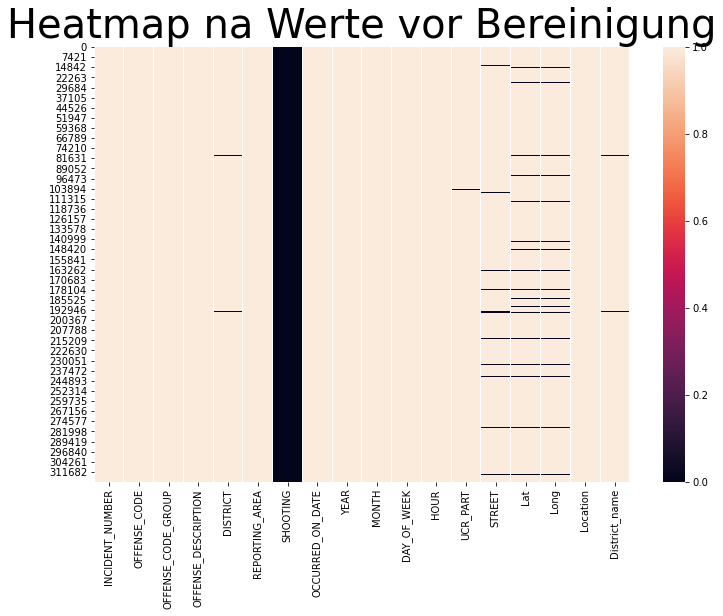

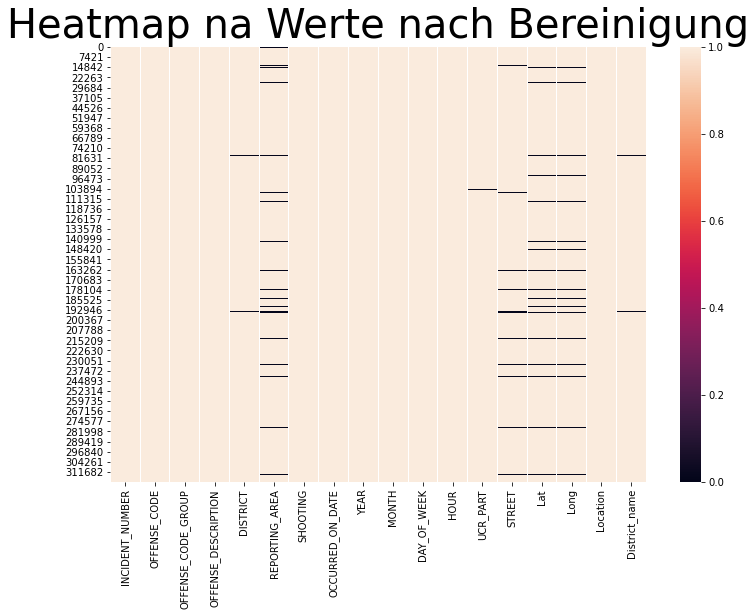

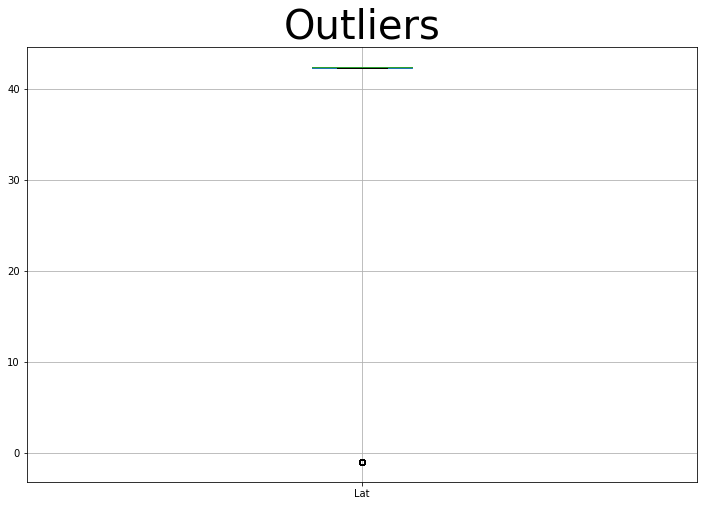

In [2]:
# Nicht benötigte Spalten löschen
del crime["Location"]
del crime["OCCURRED_ON_DATE"]
del crime["OFFENSE_CODE"]

# na values grafisch darstellen
plt.figure(figsize=(12,8))
sns.heatmap(crime.notna())
plt.title(label="Heatmap na Werte vor Bereinigung",
          fontsize=40)
plt.show()
# True = 1, False = 0

# Verfahren mit missing values (nichts machen, ersetzen, löschen)
# Reporting_Area hat Leerzeichen als Daten, Daten sichtbar machen als nan
#crime.REPORTING_AREA[crime.REPORTING_AREA==" "]
crime.REPORTING_AREA.replace(to_replace=" ",value=np.nan,inplace=True)

# Shooting Werte mit 1 und 0 ersetzt, 1=Yes, 0 = No
crime.SHOOTING=crime.SHOOTING.map({"Y":1})
crime.SHOOTING.fillna(0,inplace=True)

# na values grafisch darstellen
plt.figure(figsize=(12,8))
sns.heatmap(crime.notna())
plt.title(label="Heatmap na Werte nach Bereinigung",
          fontsize=40)
plt.show()

# Duplikate ermitteln
#crime[crime.duplicated(keep=False)]
# Duplikate löschen
crime.drop_duplicates(inplace=True,keep="first",ignore_index=True)

# Outliers ermitteln
crime.describe()
# Outliers bei Lat und Long

len(crime.Lat[crime.Lat==-1.0])
# 745 outlieres bei lat und long

# Outliers grafisch darstellen
plt.figure(figsize=(12,8))
crime.boxplot("Lat")
plt.title(label="Outliers",fontsize=40)
plt.show()

#------------------------------------------------------------------------
#Auswertungen

# Auswertungen
## Anzahl der Fälle allgemein

In [3]:
# Anzahl der Fälle allgemein
anzahl_faelle = len(crime.INCIDENT_NUMBER)
print("Es gibt "+ str(anzahl_faelle) + " Fälle")

Es gibt 319050 Fälle


## Verteilung der Verstöße (Art des Verbrechens = Offense Code Group) in der Gesamtzeit

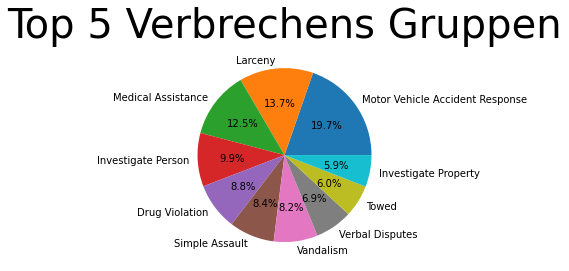

In [4]:
# Verteilung der Verstöße (Art des Verbrechens = Offense Code Group) in der Gesamtzeit
crime_without_other= crime.OFFENSE_CODE_GROUP[(crime.OFFENSE_CODE_GROUP != "Other")].copy()
top10_crime_groups= crime_without_other.value_counts(normalize=True).nlargest(10)*100
# Daten visualisieren

plt.pie(x=top10_crime_groups,labels=list(top10_crime_groups.index),autopct='%1.1f%%')
plt.title(label="Top 5 Verbrechens Gruppen",fontsize=40)
plt.show()

## Anzahl der Fälle pro Jahr

In [5]:
# Anzahl der Fälle pro Jahr
anzahl_pro_jahr = crime["YEAR"].value_counts(sort=False)
print("\nAnzahl der Fälle pro Jahr:")
print(anzahl_pro_jahr)
# Zahlen nicht aussagekräftig, da Monate bei 2015 und 2018 fehlen


Anzahl der Fälle pro Jahr:
2015     53371
2016     99110
2017    100884
2018     65685
Name: YEAR, dtype: int64


## Häufigkeit nach Jahreszeiten


Verbrechen nach Jahreszeiten
Jahreszeiten
Frühling    74431
Herbst      75947
Sommer      99939
Winter      68733
Name: INCIDENT_NUMBER, dtype: int64


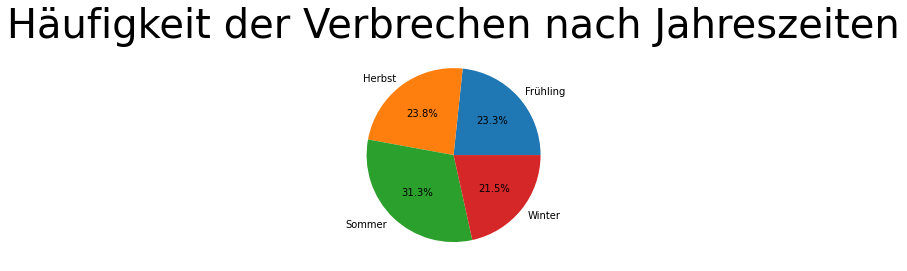

In [6]:
# Häufigkeit nach Jahreszeiten
monate = crime.groupby(["MONTH"]).INCIDENT_NUMBER.count()
monate_df = pd.DataFrame(monate)
monate_df["Jahreszeiten"] = pd.cut(monate.index,bins=[0,2,5,8,11,12],labels=["Winter","Frühling","Sommer","Herbst","Winter"],ordered=False)
verbrechen_jahreszeiten = monate_df.groupby(["Jahreszeiten"]).INCIDENT_NUMBER.sum()
print("\nVerbrechen nach Jahreszeiten")
print(verbrechen_jahreszeiten)
# Daten visualisieren
plt.pie(x=verbrechen_jahreszeiten,labels=list(verbrechen_jahreszeiten.index),autopct='%1.1f%%')
plt.title(label="Häufigkeit der Verbrechen nach Jahreszeiten", fontsize=40)
plt.show()

## Häufigkeit nach Monaten


Verbrechen nach Monaten
YEAR     2015    2016    2017    2018
MONTH                                
1         NaN  7835.0  7991.0  7782.0
2         NaN  7307.0  7408.0  6937.0
3         NaN  8199.0  8179.0  7768.0
4         NaN  8101.0  8069.0  7916.0
5         NaN  8578.0  8715.0  8906.0
6      4188.0  8558.0  8985.0  8834.0
7      8322.0  8618.0  9075.0  8538.0
8      8340.0  8938.0  9206.0  8337.0
9      8411.0  8521.0  8940.0   667.0
10     8305.0  8582.0  8846.0     NaN
11     7818.0  7922.0  7935.0     NaN
12     7987.0  7951.0  7535.0     NaN


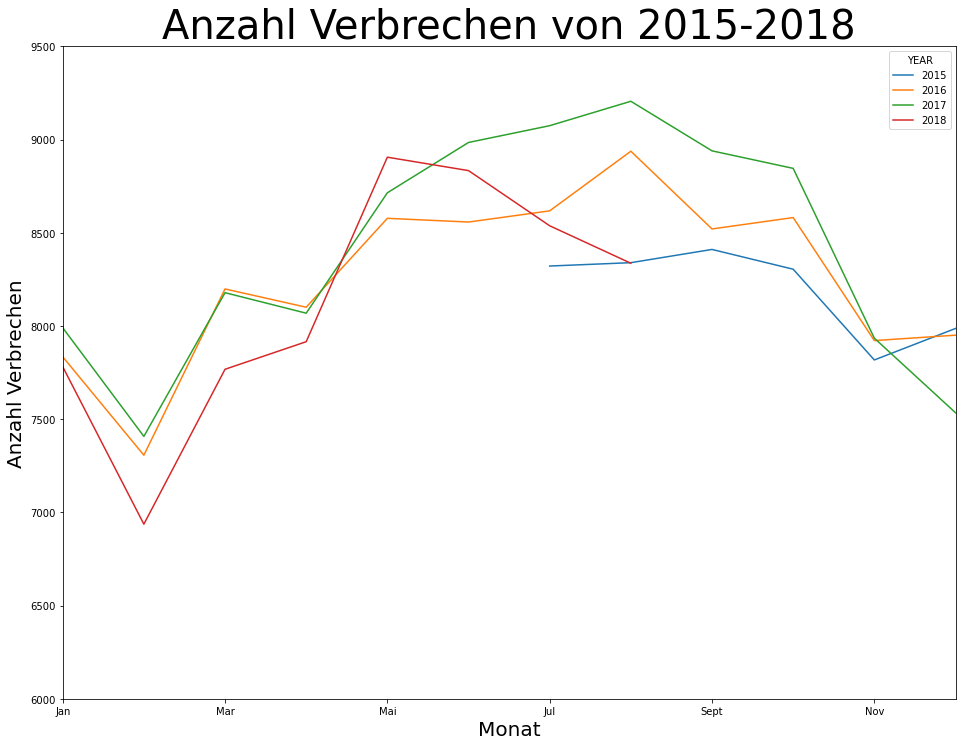

In [7]:
# Häufigkeit nach Monaten
crime_timeline=crime.pivot_table(values="INCIDENT_NUMBER",index= "MONTH",columns="YEAR",aggfunc="count")
print("\nVerbrechen nach Monaten")
print(crime_timeline)
# unvollständige Monate nan setzen
crime_timeline.replace(crime_timeline.iloc[5,0],np.nan,inplace=True)
crime_timeline.replace(crime_timeline.iloc[8,3],np.nan,inplace=True)
# Daten visualisieren
crime_timeline.plot(ylim=(6000,9500),xlim=(1,12),figsize=(16,12))
plt.title("Anzahl Verbrechen von 2015-2018",fontsize=40)
plt.xlabel("Monat",fontsize=20)
plt.ylabel("Anzahl Verbrechen",fontsize=20)
plt.xticks(ticks=range(1,12,2),labels=["Jan","Mar","Mai","Jul","Sept","Nov"])
plt.show()

## Fälle pro Stadtteil

In [8]:
# Fälle pro Stadtteil
print("\nFälle pro Stadteil\n")
faelle_pro_Stadteil = crime["District_name"].value_counts()
print(faelle_pro_Stadteil)
print(len(faelle_pro_Stadteil))
faelle_pro_Stadteil.to_excel("C:/Users/olile/Studium/Master/TH Nürnberg/1.Semester/DA mit Python/04_Boston_Crime/fertige_Auswertungen/districts.xlsx")


Fälle pro Stadteil

Roxbury          49940
Dorchester       42528
South End        41914
Downtown         35710
Mattapan         35441
South Boston     23457
Brighton         20127
Jamaica Plain    17534
Hyde Park        17347
East Boston      13544
West Roxbury     13238
Charlestown       6505
Name: District_name, dtype: int64
12


## Fälle pro Stadtteil im jeweiligen Jahr

In [9]:
# Fälle pro Stadtteil im jeweiligen Jahr
print("\nFälle pro Stadtteil im jeweiligen Jahr\n")
faelle_stadteil_jahre = crime.groupby(["District_name","YEAR"]).INCIDENT_NUMBER.count().unstack()
print(faelle_stadteil_jahre)







Fälle pro Stadtteil im jeweiligen Jahr

YEAR           2015   2016   2017  2018
District_name                          
Brighton       3280   6279   6509  4059
Charlestown    1027   1986   2167  1325
Dorchester     7363  13602  13281  8282
Downtown       6010  10922  11374  7404
East Boston    2426   4130   4264  2724
Hyde Park      2740   5223   5611  3773
Jamaica Plain  2800   5558   5514  3662
Mattapan       5616  11145  11195  7485
Roxbury        8682  15706  15680  9872
South Boston   3939   7072   7247  5199
South End      7203  12953  13157  8601
West Roxbury   2157   4017   4309  2755
